# Individuals killed by police in the US from 2000 - 2016 



## This dataset aims to provide insight into individuals who were killed during alteractions with police. It includes information on their age, race, mental health status, weapons they were armed with, and if they were fleeing.




## Now and then we are hearing from the news or reading on the internet the news about the fatal shootings by police in U.S. There is little doubt that in most of the cases the shootings are justified as the law forces are dealing with the dangerous situations and criminal offenders who otherwise can cause severe damage to the innocent public, but now and then we hear social concerns about the racial bias that continue when dealing with the fatalities of the potential offenders. The concerns are getting amplified when we hear that there are cases where police kill people who were originally unarmed. In all of the U.S. states, I want to find if such concerns are valid..

## The questions I want to answer are:

## 1. What is the trend of the police shootings in the last 17 years (is there increase or decrease in a certain year)

## 2. Months with the most fatalities

## 3. Find which Age groups are subject to most or least of the police shootings.

## 4. Find if certain ethnic groups have a larger risk of being shot while not being armed.

## 5. Find if there is a racial bias (if certain ethnic groups are being killed more than the others)

## 6. The mean age of people affected for each state

## 7. Top 10 state with the most fatalities

## 7a. Top 10 cities with the most fatalities

## 8. check victims mental status

## 8b. The most ethnic group wich suffer mental illness 

## 9. Check victims Ammunition 

## 10.Manner of death

In [1]:
#importing necessary modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [2]:
#reading my file as csv
police_fatalities = pd.read_csv(r'C:\Users\USER\Desktop\data set\Police Fatalities.csv', encoding='latin1')
police_fatalities.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False


In [3]:
police_fatalities.shape

(12491, 12)

In [4]:
police_fatalities.dtypes

UID                  int64
Name                object
Age                float64
Gender              object
Race                object
Date                object
City                object
State               object
Manner_of_death     object
Armed               object
Mental_illness        bool
Flee                  bool
dtype: object

In [5]:
police_fatalities['Date']=pd.to_datetime(police_fatalities['Date'])

In [6]:
 police_fatalities.isnull().sum()

UID                   0
Name                  0
Age                 233
Gender                8
Race               3965
Date                  0
City                  4
State                 0
Manner_of_death       0
Armed              5677
Mental_illness        0
Flee                  0
dtype: int64

In [7]:
police_fatalities.shape

(12491, 12)

## 1. What is the trend of the police shootings in the last 17 years 

## In the description below it clear that there is increase in police fatalities every year until we have big increase margin in 2015, Now let's look at what could cause this drastic increase in police fatalities.; 

## A popular website called  www.washingtonpost.com write an article on the OUTSTANDING THINGS THAT HAPPENED IN 2015, So, I selected the part that will best describe the information in needed 

#### 1. There is a shocking incidents of terrorism and mass violence to Donald Trump's ascendancy in the polls.

#### 2. Gun deaths became as common as traffic deaths in the U.S.  - according to new government data issued at the end of 2015.                  Figures from the Centers for Disease Control and Prevention showed that guns and traffic accidents each killed about 34,000                people last year in the United States, or about 93 people per day.
#### 3. A million migrants entered Europe - The number of refugees and migrants who poured into Europe in 2015  has topped 1                       million, according to newly released estimates from the International Organization for Migration. 




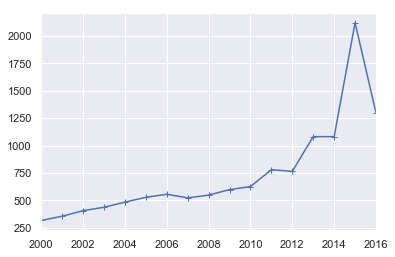

In [8]:
police_fatalities['Date'] = police_fatalities['Date'].astype('str')
police_fatalities['Year'] = police_fatalities['Date'].str[:4]
police_fatalities['Year'].value_counts().sort_index().plot( marker='+', linestyle='-')

## 2. Months with the most fatalities

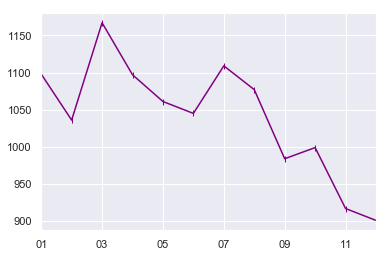

In [9]:
police_fatalities['Months'] = police_fatalities['Date'].str[5:7]
police_fatalities['Months'].value_counts().sort_index().plot(color='purple', marker = "|")

### March is a month where everything is shifting. Winter is turning into spring, snow is melting, and flowers are blooming. There are many festivals, parades, holidays, and events happening in March in the USA. If you're planning a trip around one of these big days, be sure to plan ahead and be prepared for large crowds and many tourists.


### In addition to these fun events, many college students in the United States have their spring breaks in March. Popular beaches and cities in Florida and California will be full of young tourists looking to take a break from their studies. So it is obvious that there is no way there will be no form of crime where there is a lot of crowd.., we can say that is hwy there is a lot of fatalities in the month of march than any other months.

## 3. Find which Age groups are subject to most or least of the police shootings.

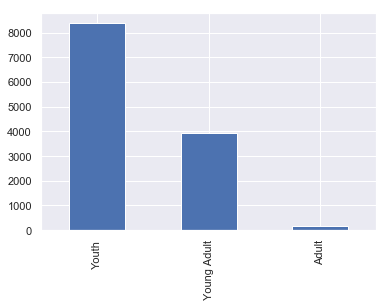

In [10]:
age_group=[]
for i in police_fatalities['Age']:
    if i >= 70:
        age_group.append('Adult')
    elif i >= 40:
        age_group.append('Young Adult')
    else:
        age_group.append('Youth')
police_fatalities['Age group']=age_group

police_fatalities['Age group'].value_counts().plot(kind = 'bar')

### The Youths involved most in crimes because the Youths are still hyper-active and strong and could do anything within their reach 
 
    

## 4. Find if certain ethnic groups have a larger risk of being shot while not being armed.

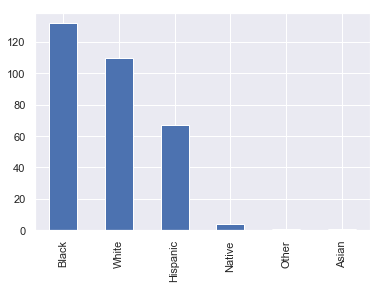

In [11]:
ethnic = police_fatalities[police_fatalities['Armed'] == 'Unarmed']
ethnic['Race'].value_counts().plot(kind='bar')

## 5. Find if there is a racial bias (if certain ethnic groups are being killed more than the others)

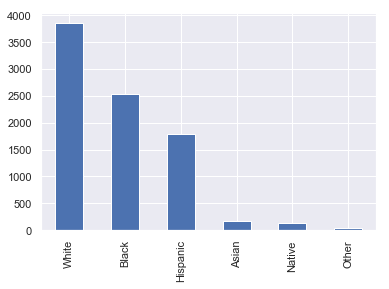

In [12]:
police_fatalities.Race.value_counts().plot(kind = 'bar')

## There is not racial bias from the police according to the statitics we get from our data set - becuase the white suffers more of the police fatalities

## 6. The mean age of people affected for each state

In [13]:
police_fatalities.groupby(['State']).Age.mean()

State
AK    35.888889
AL    37.628571
AR    39.117647
AZ    35.277385
CA    33.975201
CO    34.533113
CT    37.371795
DC    32.283333
DE    39.125000
FL    35.283449
GA    36.177536
HI    37.681818
IA    36.268293
ID    37.383721
IL    31.791246
IN    36.301887
KS    36.049020
KY    39.574257
LA    34.823009
MA    35.500000
MD    34.257732
ME    40.140000
MI    34.878049
MN    36.954023
MO    35.069519
MS    36.807229
MT    39.614035
NC    36.798658
ND    37.615385
NE    34.880000
NH    37.482759
NJ    34.357724
NM    34.600000
NV    35.294118
NY    34.855670
OH    34.581590
OK    35.808383
OR    40.014151
PA    34.415301
RI    34.250000
SC    38.000000
SD    32.968750
TN    37.000000
TX    34.443576
UT    34.960265
VA    36.824324
VT    47.476190
WA    36.907591
WI    34.321101
WV    43.745763
WY    39.714286
Name: Age, dtype: float64

## 7. Top 10 States with the most fatalities

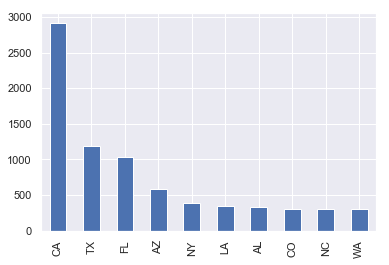

In [14]:
police_fatalities['State'].value_counts().head(10).plot(kind='bar')

### California was the state with the highest resident population in the United States in 2020, with 39.37 million people. This could be a real reason for police fatalities to be more in Carlifornia

## 7a. Top 10 Cities with the most fatalities

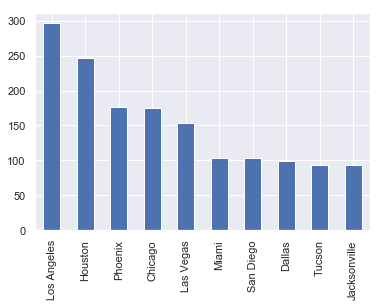

In [15]:
police_fatalities['City'].value_counts().head(10).plot(kind='bar')

## 8. check victims mental status 

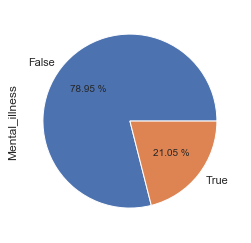

In [16]:
# Percentage of police with ental illness 
police_fatalities['Mental_illness'].value_counts().plot(kind = 'pie', autopct = '%.2f %%')

## 8a. The ethnic group wich suffer mental illness

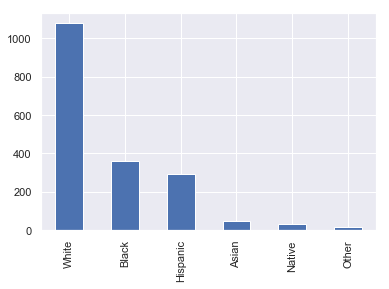

In [17]:
ment_illness = police_fatalities[police_fatalities['Mental_illness'] == True]
ment_illness['Race'].value_counts().plot(kind='bar')

## 9. Check victims Ammunition 

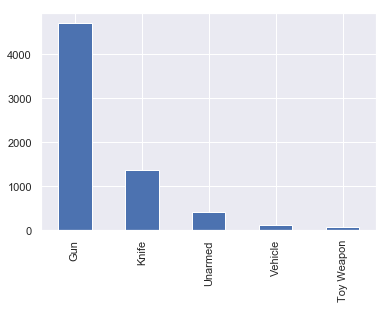

In [18]:
police_fatalities.Armed.value_counts().head().plot(kind='bar')

## 10. Manner of death

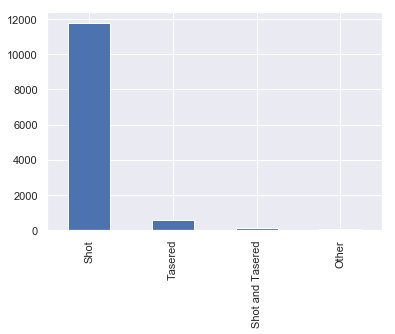

In [19]:
police_fatalities['Manner_of_death'].value_counts().plot(kind = 'bar')